<a href="https://colab.research.google.com/github/ShirinHatam/CCN_fashionMnist/blob/main/CNNfashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
import requests
from io import BytesIO
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
# Load data and preprocess it
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Add a new axis to indicate the single channel for grayscale images
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Split validation dataF
val_split = 0.1
val_samples = int(val_split * x_train.shape[0])
x_val = x_train[-val_samples:]
y_val = y_train[-val_samples:]
x_train = x_train[:-val_samples]
y_train = y_train[:-val_samples]
# Create the model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28 , 28 , 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#train and save
checkpoint_filepath = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

 #Define a ModelCheckpoint callback to save the best model during training
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])


Epoch 1/30
421/422 [============================>.] - ETA: 0s - loss: 0.6900 - accuracy: 0.7492
Epoch 1: val_loss improved from inf to 0.40706, saving model to best_model.h5
422/422 [==============================] - 5s 6ms/step - loss: 0.6897 - accuracy: 0.7493 - val_loss: 0.4071 - val_accuracy: 0.8532
Epoch 2/30
418/422 [============================>.] - ETA: 0s - loss: 0.4253 - accuracy: 0.8448
Epoch 2: val_loss improved from 0.40706 to 0.36206, saving model to best_model.h5
422/422 [==============================] - 2s 5ms/step - loss: 0.4251 - accuracy: 0.8448 - val_loss: 0.3621 - val_accuracy: 0.8603
Epoch 3/30
417/422 [============================>.] - ETA: 0s - loss: 0.3682 - accuracy: 0.8659
Epoch 3: val_loss improved from 0.36206 to 0.32226, saving model to best_model.h5
422/422 [==============================] - 2s 5ms/step - loss: 0.3678 - accuracy: 0.8659 - val_loss: 0.3223 - val_accuracy: 0.8805
Epoch 4/30
415/422 [============================>.] - ETA: 0s - loss: 0.3332 

In [ ]:

# saving model
model.save('path/to/save/model.h5')
# Evaluate the best model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Best Model - Test Loss:", loss)
print("Best Model - Test Accuracy:", accuracy)


#Calculate evaluation metrics
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
loss = model.evaluate(x_test, y_test, verbose=0)[0]


# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the results
print('Test accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Loss:', loss)
confusion = confusion_matrix(y_test_classes, y_pred_classes)
print('Confusion Matrix:')
print(confusion)

Best Model - Test Loss: 0.2274031937122345
Best Model - Test Accuracy: 0.9192000031471252
313/313 [==============================] - 1s 2ms/step


ValueError: ignored

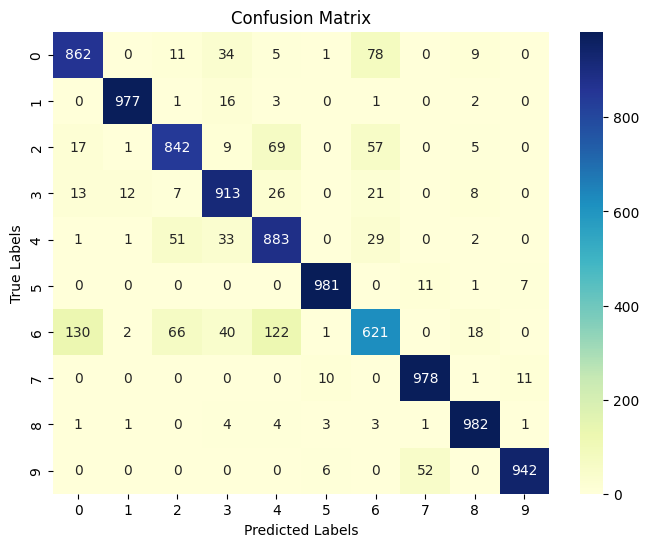

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="YlGnBu", xticklabels=np.arange(10),
            yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define a function to preprocess the image from the URL
def preprocess_image(image_url):
    response = requests.get(image_url)
    image = load_img(BytesIO(response.content), target_size=(28, 28), color_mode='grayscale')
    image_array = img_to_array(image)
    image_array = image_array.astype('float32') / 255
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

# Define the URL of the image you want to test
image_url = 'https://media.istockphoto.com/id/836402494/vector/dress-icon-on-black-and-white-vector-backgrounds.jpg?s=612x612&w=0&k=20&c=lhgQbN6iQcW8MzpYcOJce_v4eYDRHuYftQWeCSePcJo='

# Preprocess the image
processed_image = preprocess_image(image_url)

# Make predictions using the model
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions[0])

# Assuming you have a list of class names corresponding to fashion_mnist classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print the predicted class
print("Predicted class:", class_names[predicted_class])

1/1 [==============================] - 0s 19ms/step
Predicted class: Ankle boot
